#**Text Classification**

## Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

## Read Dataset

In [2]:
df = pd.read_csv('fake_or_real_news.csv')
df.fillna(' ')
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df["title"]=df["title"].str.lower()
df["text"]=df["text"].str.lower()
df["label"]=df["label"].str.lower()

In [4]:
# remove punctuation
df['text'] = df['text'].apply(lambda x: re.sub('[^\w\s]', ' ', x))
df['title'] = df['title'].apply(lambda x: re.sub('[^\w\s]', ' ', x))

In [5]:
# remove one and two character words
df['text'] = df['text'].apply(lambda x: re.sub(r'\b\w{1,3}\b', '', x))
df['title'] = df['title'].apply(lambda x: re.sub(r'\b\w{1,3}\b', '', x))

In [6]:
# remove numerical values
df['text'] = df['text'].apply(lambda x: re.sub(r'[0-9]+', '', x))
df['title'] = df['title'].apply(lambda x: re.sub(r'[0-9]+', '', x))

In [7]:
# \s+ means all empty space (\n, \r, \t)
df['text'] = df['text'].apply(lambda x: re.sub('\s+', ' ', x))
df['title'] = df['title'].apply(lambda x: re.sub('\s+', ' ', x))

In [8]:
labels = df.label
labels.head()

0    fake
1    fake
2    real
3    fake
4    real
Name: label, dtype: object

## Split Dataset

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=69)

## Initialize TF-IDF Vectorizer

In [10]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')

# Fit, and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

## Initialize Passive Aggresive Classifier

In [11]:
# Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=100)
pac.fit(tfidf_train,y_train)

# Predict on the test set
y_pred = pac.predict(tfidf_test)

## Evaluation/Accuracy


In [12]:
score_pac = accuracy_score(y_test,y_pred)
print(f'Passive Aggresive Classifier Accuracy: {round(score_pac*100,2)}%')

Passive Aggresive Classifier Accuracy: 93.53%


In [13]:
matrix = confusion_matrix(y_test,y_pred)
print (matrix)

[[596  39]
 [ 43 589]]


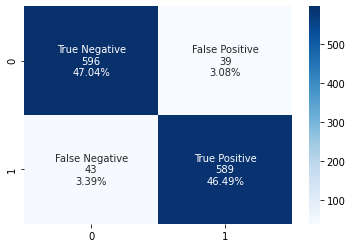

In [14]:
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

In [15]:
# fit the training dataset on the NB classifier
# from sklearn.naive_bayes import MultinomialNB
Naive = MultinomialNB()
Naive.fit(tfidf_train,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(tfidf_test)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(y_test, predictions_NB)*100)

Naive Bayes Accuracy Score ->  83.58326756116811


In [16]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tfidf_train,y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(tfidf_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(y_test,predictions_SVM)*100)

SVM Accuracy Score ->  93.68587213891081
